In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [3]:
test=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/log_regression/test.csv')
train=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/log_regression/train.csv')

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

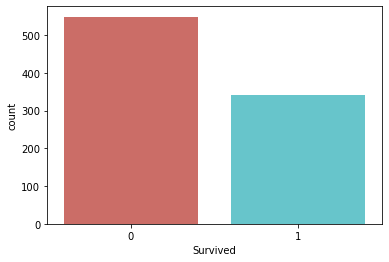

In [13]:
sns.countplot(x=train['Survived'],data=train,palette='hls')
plt.show()

In [15]:
count_death = len(train[train['Survived']==0])
count_live = len(train[train['Survived']==1])
pct_of_death = count_death/(count_death+count_live)
print("Death Rate", pct_of_death*100,"%")
pct_of_live = count_live/(count_death+count_live)
print("Survival Rate", pct_of_live*100,"%")

Death Rate 61.61616161616161 %
Survival Rate 38.38383838383838 %


In [16]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Text(0, 0.5, 'Number of Passengers')

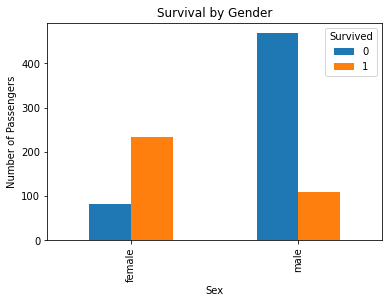

In [47]:
pd.crosstab(train.Sex,train.Survived).plot(kind='bar')
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

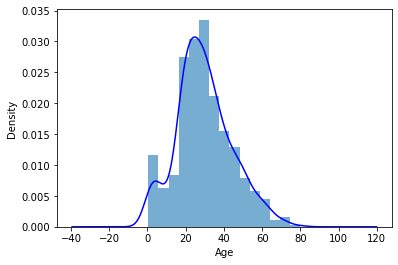

In [25]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, alpha=0.6)
train["Age"].plot(kind='density', color='blue')
ax.set(xlabel='Age')
plt.show()

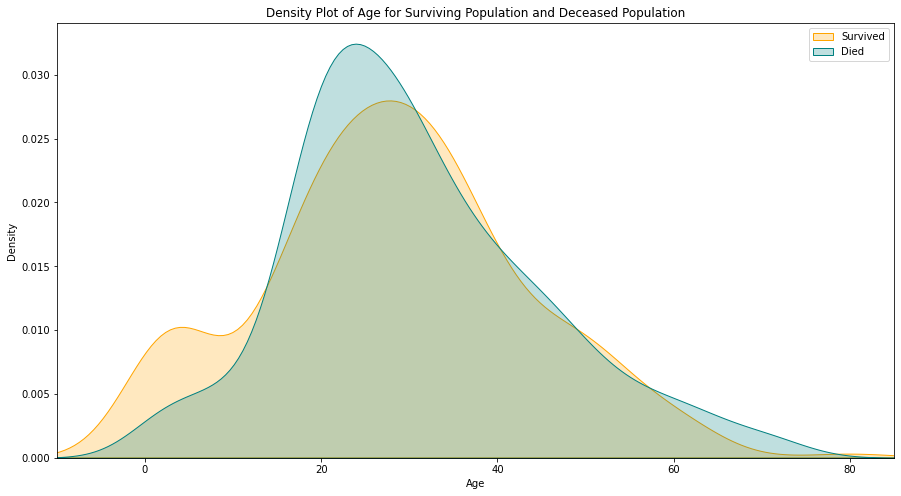

In [30]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Age"][train.Survived == 1], color="orange", shade=True)
sns.kdeplot(train["Age"][train.Survived == 0], color="teal", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Surviving Population and Deceased Population by Age')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

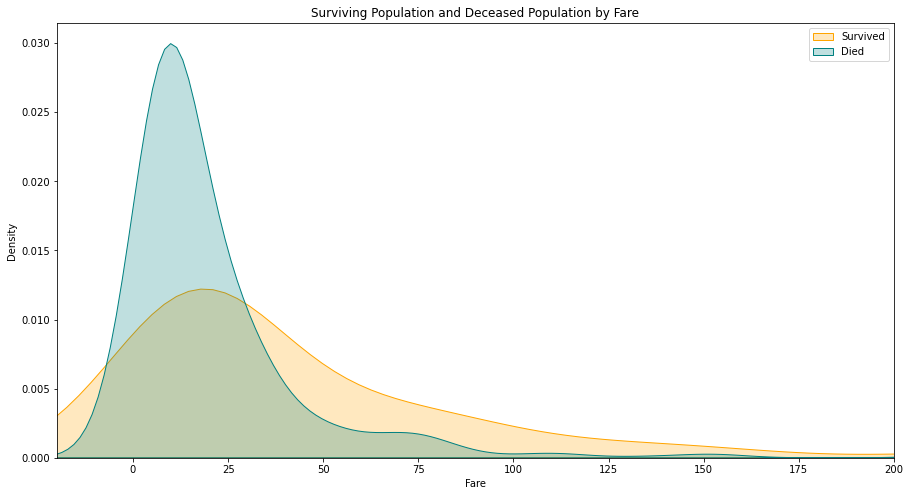

In [31]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Fare"][train.Survived == 1], color="orange", shade=True)
sns.kdeplot(train["Fare"][train.Survived == 0], color="teal", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Surviving Population and Deceased Population by Fare')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

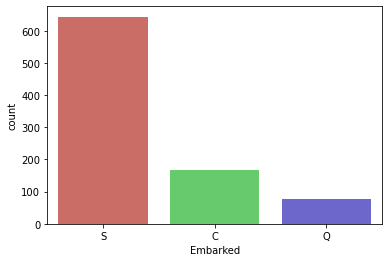

In [28]:
sns.countplot(x='Embarked', data=train, palette='hls')
plt.show()

Text(0, 0.5, 'Number of Passengers')

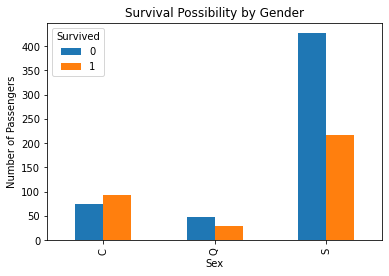

In [29]:
pd.crosstab(train.Embarked,train.Survived).plot(kind='bar')
plt.title('Survival Possibility by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

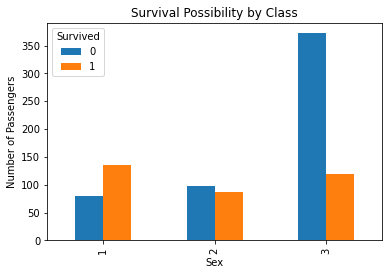

In [49]:
pd.crosstab(train.Pclass,train.Survived).plot(kind='bar')
plt.title('Survival Possibility by Class')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

## Checking Missing Values

In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
print('Percent of missing "Age" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Age" records is 19.87%
Percent of missing "Cabin" records is 77.10%
Percent of missing "Embarked" records is 0.22%


In [44]:
train_df = train.copy()
train_df['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
train.head(20)
train_df["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)

In [45]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Dropping irrevalant column and changing catergorical data into values

In [46]:
train_df.drop("Name", inplace=True, axis=1)
train_df.drop("Ticket", inplace=True, axis=1)

In [48]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [52]:
train_2 = pd.get_dummies(train_df, columns=["Pclass","Embarked","Sex"])
train_2.drop('Sex_female', axis=1, inplace=True)

In [53]:
train_2

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,1,0,22.00,1,0,7.2500,0,0,1,0,0,1,1
1,2,1,38.00,1,0,71.2833,1,0,0,1,0,0,0
2,3,1,26.00,0,0,7.9250,0,0,1,0,0,1,0
3,4,1,35.00,1,0,53.1000,1,0,0,0,0,1,0
4,5,0,35.00,0,0,8.0500,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00,0,0,13.0000,0,1,0,0,0,1,1
887,888,1,19.00,0,0,30.0000,1,0,0,0,0,1,0
888,889,0,21.75,1,2,23.4500,0,0,1,0,0,1,0
889,890,1,26.00,0,0,30.0000,1,0,0,1,0,0,1


In [54]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
test_df = test.copy()
test_df['Age'] = test.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
test_df["Fare"].fillna(test["Fare"].mean(skipna=True), inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

test_2 = pd.get_dummies(test_df, columns=["Pclass","Embarked","Sex"])
test_2.drop('Sex_female', axis=1, inplace=True)
test_2.drop('Name', axis=1, inplace=True)
test_2.drop('Ticket', axis=1, inplace=True)

In [58]:
test_2.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

## use train data to build logistic model and evaluate with 20% split

In [98]:
from sklearn.linear_model import LogisticRegression
##from sklearn.feature_selection import RFE ## to determine optimal # of features 

features = ["Age","Fare","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X = train_2[features]
Y= train_2['Survived']
model = LogisticRegression()

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [100]:
model.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [103]:
print("Survived", sum(y_pred!=0))
print("NOT Survived", sum(y_pred==0))

Survived 62
NOT Survived 117


In [109]:
print("Model accuracy is %2.3f" % accuracy_score(Y_test, y_pred))

Model accuracy is 0.793


Text(0.5, 1.05, 'confusion matrix')

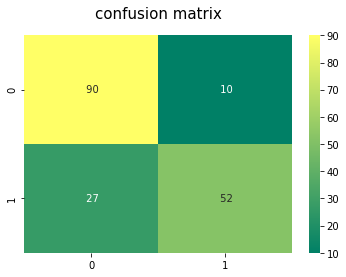

In [117]:
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('confusion matrix', y=1.05, size=15)

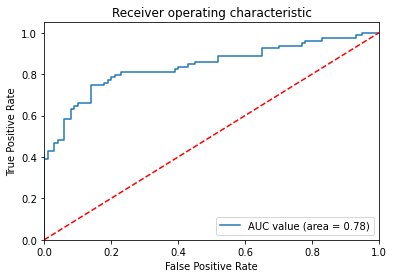

In [131]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC value (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [123]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       100
           1       0.84      0.66      0.74        79

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.79      0.79       179



In [ ]:
#Model evaluation based on K-fold cross-validation using cross_validate() function

## Apply the model to test data to predict

In [120]:
x_testing = train_2[features]

In [121]:
y_test_predict= model.predict(x_testing)

In [122]:
print("Survived", sum(y_test_predict!=0))
print("NOT Survived", sum(y_test_predict==0))

Survived 304
NOT Survived 587
